In [1]:
import numpy as np
import tensorflow as tf
from rhirl import *

from simple_rl.tasks import NavigationMDP
from simple_rl.agents import QLearningAgent
from simple_rl.planning import ValueIteration
from simple_rl.tasks.grid_world.GridWorldStateClass import GridWorldState

from rhirl_plotting import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
np.random.seed(1)
tf.set_random_seed(0)
e_row = 1
mdp_entangled_feature = NavigationMDP(width=9, 
                        height=8,
                        goal_locs=[(5,8)],
                        init_loc=(1,1),
                        rand_init=True,
                        cell_types=['white', 'yellow', 'red', 'lime', 'magenta'], #["white", "yellow", "red", "green", "purple"],
                        cell_type_rewards=[0, 0, -10, -10, -10],
                        goal_reward=1,
                        slip_prob=0.00,
                        step_cost=0.5, 
                        vacancy_prob=1.,
                        additional_obstacles = {1: [(6,e_row), (4,e_row)], 
                                                2: [(7,e_row), (3,e_row)], 
                                                3: [(8,e_row), (2,e_row)] + [(i,6) for i in range(2,10)],
                                                4: [(9,e_row), (1,e_row)]},
                        gamma=.99)


nvmdp = mdp_entangled_feature
value_iter = ValueIteration(nvmdp, sample_rate=1)
_ = value_iter.run_vi()
v_objective_map = np.zeros((nvmdp.height, nvmdp.width), dtype=np.float32)
for row in range(nvmdp.height):
    for col in range(nvmdp.width):
        x, y = nvmdp._rowcol_to_xy(row, col)
        v_objective_map[row, col] = value_iter.value_func[GridWorldState(x, y)]

In [3]:
phi = nvmdp.feature_long_at_state
phi_loc = nvmdp.feature_long_at_loc
w_rand = np.random.rand(len(phi(nvmdp.get_init_state())),1)
r_feat = compute_cell_rewards(nvmdp, w_rand, phi_loc)

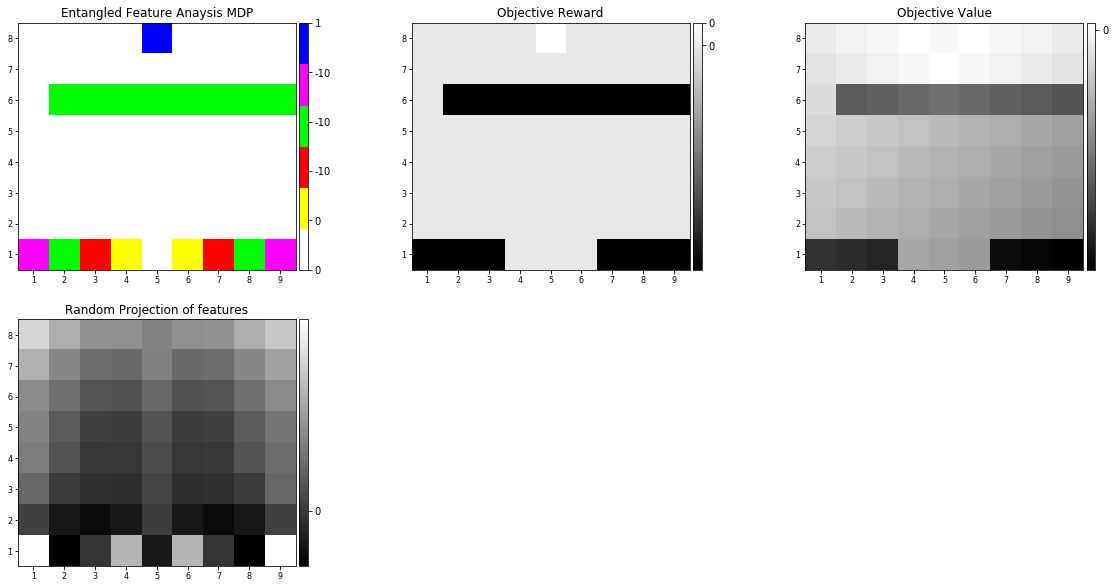

In [4]:
np.random.seed(0)
N_tau = 4
D_traj_states, D_traj_actions = nvmdp.sample_data(n_trajectory=N_tau, 
                                                    init_states=[], #[GridWorldState(29,1), GridWorldState(1,30), GridWorldState(2,1), GridWorldState(30,28)], #GridWorldState(1,7)],
                                                    init_repetition=False, 
                                                    policy=value_iter.policy)
plt.figure(figsize=(20,10))
nvmdp.visualize_grid(nvmdp.cells, trajectories=None, 
                     subplot_str="231", new_fig=False, show_rewards_cbar=True, title="Entangled Feature Anaysis MDP")
nvmdp.visualize_grid(nvmdp.cell_rewards, trajectories=None, 
                     subplot_str="232", new_fig=False, show_rewards_cbar=True, cmap=plt.cm.gray, title="Objective Reward")
nvmdp.visualize_grid(v_objective_map, trajectories=None, 
                     subplot_str="233", new_fig=False, show_rewards_cbar=True, cmap=plt.cm.gray, title="Objective Value")
nvmdp.visualize_grid(r_feat, trajectories=None, 
                     subplot_str="234", new_fig=False, show_rewards_cbar=True, cmap=plt.cm.gray, title="Random Projection of features")